### The following is from [HERE](https://geographicdata.science/book/notebooks/06_spatial_autocorrelation.html), then modified as the example is worked through

## Global Spatial Autocorrelation

Spatial auto correlation refers to the "finctional relationship of what happens at one point in space and what happens elsewhere" [As88](https://geographicdata.science/book/notebooks/references.html#id8).  Spatial auto correlation measures the degree of which the simmilarity in values between observations in a dataset relate to the locations of those observations. This is a simmilar concept to the measure of correlation between two variables, which informs us of how the changes in one variable change as a function of another, except in the case of spatial auto correlation we observe how the changes in one variable change as a function of space. There are some distinct differences we will explore. In a similar fassion, spatial autocorrelation is also related (but distinct) to the temporal counterpart - *temporal autocorrelation* - which relates the values at a point in time to that in a given time at previous periods. In conteast to these other ideas of correlation, *spatial autocorrelation* relates the value of the variable of interest to a given location, whith values of the same variable in other locations. An alternative way to understand the concept is as the degree of information contained in the value of a variable at a given location about the value of that same variable in other locations.

### Understanding spatial autocorrelation
The concept of spatial autocorrelation can be illistrauted through understanding what the *absence* of spatial auto correlation. The core idea is that if spatial randomness - where the location of an observation gives no information whatsoever of the value. In other words, a variable is spatially random if its distribution follows no discernable spatial pattern. Spatial autocorrelation can thus be defined as the "absence of spatial randomness". 

This definition may still be too vague - to get more specific, spatial autocorrelation is typically categorized along two main dimentions: sign and scale. Simmisar to the traditional, non-spatial case, spatial autocorrelation can adopt two main forms: *positive* and *negative*. The former relates to a situation where similarity in observation values and geographical closeness go hand-in-hand. In other words, similar values are located near eachother, while dissimilar valuesthend to be scatteres and further away. it is important that the sign of these values is not relevent for the presence of spatial autocorrelation: high values close to high values or low values close to low values. The important bit in this context is a positive relation between spatial closeness of the observations and statistical value similarity. This is a fairly common case in many social contexts and, in fact, several human phenomena display clearly positive spatial autocorrelation. Foe example, think of the distribution of income, (or poverty), over space - it is common to find similat values located nearby (walthy areas near wealth areas, poor populations concentrated in space too). In contract negative spatial autocorrrelation reflects a situation where similar values tend to be located away from each other to maximize coverage; statistical similarity associated with increased distance. This is somewhat less common in the social sciences, but reflects a situation where spatial dispersion is prefered: as with competition for goods and services offered by supermarkets. The distribution of different brands, supermarkets, hospitals, distribution facilities usually follow an pattern of negative spatial dependence. 

It can also be useful to inderstand spatial autocorrelation using the scale at which it is considered. We gnerally talk of global or local processes. **Global** spatial autocorrelation consideres the overall trend that the location of values follow. In doing this, **the study of global spatial autocorrelation makes possible statements about the degree of clustering in the dataset.** Do values generally follow a particular pattern in their geographical distribution? Are similar values closer to other similar values than we would expect from pure chance? These are some of the questions that relate to global spatial autocorrelation. **Local** autocorrelation examines devations from the global trend at much more focused levels than the entire map. 

We will explore these comcepts with an applied example, interrogating the dataset about the presence, nature, and strength of global spatial autocorrelation. To accomplish this we will use a suite of tools collectivly known as Exploratory Spatatial Data Analysis (ESDA). Analogous to its non-spatial counterpart (EDA; [Tuk77](https://geographicdata.science/book/notebooks/references.html#id56)), ESDA has been specificallly designed for this purpose, and puts space and relative location of the observations in a dataset at the forefront of the analysis. The range of ESDA methods is wide and spans from simpilar aproaches like cloroplejth mapping, to more advanced and robust methodologies that include statistical inference and explicit recognition of the geographical arrangment of the dataset. 

### An emperical illistration: the EU Referendum

To illustrate the notion of spatial autocorrelation and its different variants, let us turn to an example with real world data. 

In [2]:
# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.viz import splot
from splot.esda import plot_moran
import contextily

#analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/home/skye/miniconda3/envs/Spatial_stats/lib/python3.11/site-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In 2016 the United Kingdom ran a referendum to decide whether to remain in the European Union or th leave the club; the so-called "Brexit" vote. We will use the official data from the Electorial Commission and the local authority district (LAD) level on percentage of voates for the Remain and Leave campaigns. There are two distinct datasets we will combine:

* Electoral Commission data on vote percentages at the local authority level. [CSV](https://web.archive.org/web/20170519102152if_/http://www.electoralcommission.org.uk:80/__data/assets/file/0014/212135/EU-referendum-result-data.csv)
* ONS Local Authority Districts (December 2016) Generalized Clipped Boundaries in the UK WGS84. [geoJSON](https://geoportal.statistics.gov.uk/datasets/7ecd281c3dfb42b6a5efeee2a68449b3/explore?location=46.568951%2C-20.834564%2C3.65)


In [7]:
brexit_data_path = "../data/EU-referendum-result-data.csv"
ref = pd.read_csv(brexit_data_path, index_col="Area_Code")
ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, E06000031 to E08000036
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       382 non-null    int64  
 1   Region_Code              382 non-null    object 
 2   Region                   382 non-null    object 
 3   Area                     382 non-null    object 
 4   Electorate               382 non-null    int64  
 5   ExpectedBallots          382 non-null    int64  
 6   VerifiedBallotPapers     382 non-null    int64  
 7   Pct_Turnout              382 non-null    float64
 8   Votes_Cast               382 non-null    int64  
 9   Valid_Votes              382 non-null    int64  
 10  Remain                   382 non-null    int64  
 11  Leave                    382 non-null    int64  
 12  Rejected_Ballots         382 non-null    int64  
 13  No_official_mark         382 non-null    int64  
 14  Voting_for_both_a

While the shapes of the geographical units (local authority districts, in this case) are stored in a compressed GeoJSON file, we can read it directly from the .zip file as follows:

In [14]:
lads = gpd.read_file(
                     "../data/LAD_Dec_2016_GCB_in_the_UK_WGS84_2022_-5495227069679413294.zip",
                    ).set_index("lad16cd")

lads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 391 entries, E06000001 to W06000024
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lad16nm   391 non-null    object  
 1   lad16nmw  22 non-null     object  
 2   bng_e     391 non-null    int64   
 3   bng_n     391 non-null    int64   
 4   long      391 non-null    float64 
 5   lat       391 non-null    float64 
 6   GlobalID  391 non-null    object  
 7   geometry  391 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 27.5+ KB


We can look at several variables in these data, however we will focus on 'Pct_Leave', which measuers the proportion of votes in favor of leaving the European Union. For convienence lets join these two dataframes - merging the tabular spatial data with the voting information on their indicies set on read-in which are "lad16nm"(code for the local administrative districts)  and "Area_code" (for the referendum data). Then project the geometry to a Sperical Mercator Coordintate Reference System (crs). SPerical Mercator being the prefered choice of web maps - which allows for an easy reference to contexual tiles later-on.

In [15]:
db = (
    gpd.GeoDataFrame(
        lads.join(ref[["Pct_Leave"]]), crs=lads.crs
    )
    .to_crs(epsg=3857)[
        ["GlobalID", "lad16nm", "Pct_Leave", "geometry"]
    ]
    .dropna()
)
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 380 entries, E06000001 to W06000024
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GlobalID   380 non-null    object  
 1   lad16nm    380 non-null    object  
 2   Pct_Leave  380 non-null    float64 
 3   geometry   380 non-null    geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 14.8+ KB


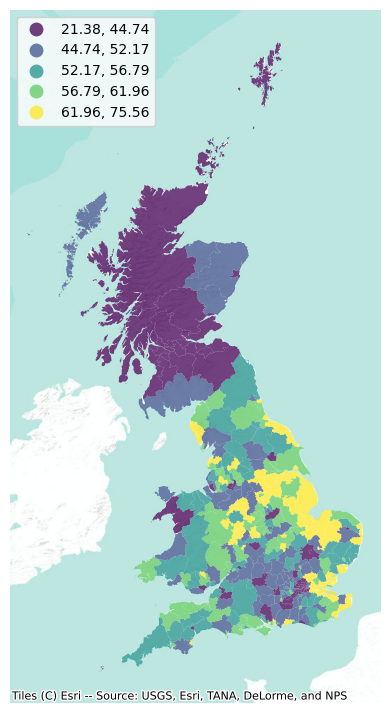

In [17]:
fig, ax = plt.subplots(1, figsize=(9,9))

db.plot(
        column="Pct_Leave",
        cmap="viridis",
        scheme="quantiles",
        k=5,
        edgecolor="white",
        linewidth=0.0,
        alpha=0.75,
        legend=True,
        legend_kwds={"loc":2},
        ax=ax,
        )

contextily.add_basemap(
        ax,
        crs=db.crs,
        source=contextily.providers.Esri.WorldTerrain,
)

ax.set_axis_off()


The final piece of information before we can compute the global spatial autocorrelations we need is to generate the spatial weights matrix. We will use the eight nearest neighbors for the sake of this example - although other methods are valid as well. We will also row-standardize them. 

In [18]:
# Generate w from the GeoDataFrame
w = weights.KNN.from_dataframe(db, k=8)

# Row-standardization to 1 
w.transform = "R" 

### Global Spatial Autocorrelation

The map above is a very good way to begin exploring the dominate spatial petterns in these data. At first glance it appears to display a fair amount of positive spatial autocorrelation: Local authorities with high percentages of votes to leave the EU tend to be next to eachother (for example the eastern region North of London), as are those where a lesser proportion of the constituants vited to leave the EU (e.g. Scotland to the North). Humans however are greate at identifying patterns; All over our history since we started as a species, life has rewarded pattern recognition abilities and punished individuals lacking it. Better to err on the side of caution in recognizing a snake or predetor in a tree. Think of the advantage our ancestors had if they were able to spot particular shapes or movement when hunting, or the trouble they could get into if they were not able to recognize certain others in the darkness of night. This extraordinary capacity to spot trends, patterns, or associations tehds to create many false positives; cases in which we believe and association exists, but in fact what we are seeing is largly random [She08](https://www.scientificamerican.com/article/patternicity-finding-meaningful-patterns/). This is particuarly accentuated in the case of maps where the size and shape of geometries can also significantly distort our perception of the underlying pattern. When looking at the map above, for example, we can have an educated guess about the presence of spatial autocorrelation; but actually determining whether what we are seeing could have arose from pure chance or is an indication of an underlying signal is usually easier said than done. 

Identifying the liklihood of chasnce or signal is percicely the purpose of indicators of global spatial autocorrelation: to leverage the power of statisticsto help us first summarize the spatial distribution of values present in the map, and second  obtain a formal quantification of the departure from that of a random distribution. These are statistics to characterize a map in terms of its degree of clustering and summarize it, either in a visual or numarical manner. However, before we can dive into the statistics we need to understand a core building block: **spatial lag**. With that concept under our belts, we are in a position to build a good understanding of global spatial autocorrelation. We will ease into spatial lag with a binary case - when observations can take two (potentially categorical) values, before we cover the two workhorses of the continious case: the Moran Plot and Moran's I. 

#### Spatial Lag

The spatial lag operator is one of the most common and direct applications of spatial weights matricies (called **W** formally) in spatial analysis - alowing us to represent the spatial relationships as a mathamatical topography or graph (with edges and nodes). Ultimatily this can be extended as a graph with bi dirction edges across space and undirecitonal edges through time.

The mathamatical definition of the product of  **W** and the vector of a given variable. Conceptually, the spatial lag captures the behavior of a variable in the immediate sorroundings of each locations; in that respect it is akin to a local smoother of a variable. 

We ca formally express it in matrix notation as: 

$Y_{sl} = \textbf{W} Y$

or, in individual notation as: 

$y_{sl-i} = \sum_j w_{ij} y_j$

where $w_{ij}$ is the cell in $\textbf{W}$ on the $i$-th row and the $j$-th column, thus capturing the relationship between observations $i$ and $j$. $y_{sl-i}$ thus captures the product of the values and weights of each observation other than $i$ in the dataset. Because non-neighbors recieve a weight of zero, $y_{sl-i}$  really captures the product of values for $i$'s neighbors - which fundamentally makes this a sparse matrix (only recording values for a small subset over a larger domain). If $\textbf{W}$ is binary, this will amount to the sum of the values of $i$'s neighbors (useful in some contexts, such as in the study of market potential); if $\textbf{W}$ is standardized - a common and widly used transformation - then $w_{ij}$ is boind between zero and 1; the spatial lag thus becomes a "local average," (the average value of $\textbf{Y}$ in the neighborhood of each observation $i$). This latter meaning is the one that we will usee that wnables our analysis of spatial autocorrelation. 

As we will discover, the spatial lag is a key element of many spatial analysis techniques and, as such, it is fully supported in Pysal. To compute the spatial lag of a given variable, Pct_Leave for example, we can do the following: 

In [19]:
db["Pct_Leave_lag"] = weights.spatial_lag.lag_spatial(w, db["Pct_Leave"])

Let's peek into two local autority dostricts to gain a better intuition of what is behind the spatial lag:

In [21]:
db.loc[["E08000012", "S12000019"],["Pct_Leave", "Pct_Leave_lag"]]

,Pct_Leave,Pct_Leave_lag
lad16cd,,
E08000012,41.81,54.61375
S12000019,37.94,38.01875


The first row (E08000012) represents Liverpool, which was a notorious "Remainer" islanf among the mostly-Leave North of England. Outside fo London and Scotland, it was one of a few locations with less than majority to leave. The second row (S12000019) represents Midlothain, in Scotland, where no local authority voted to leave. Although both Liverpool and Midlothian display a similar level of the population who voted to leave (~42% and 38%) respectivly), the difference in their spatial lags captures the wider geographical context, which are quite different: a hard "edge" relative to the sorrounding 8 nearest neighbors in the case of Liverpool - a maundane transition in the case of Midlothain. 

To conclude this section viually: the smoothing nature of the lag can be approciated in the following map comparison in the following (Figure 2).

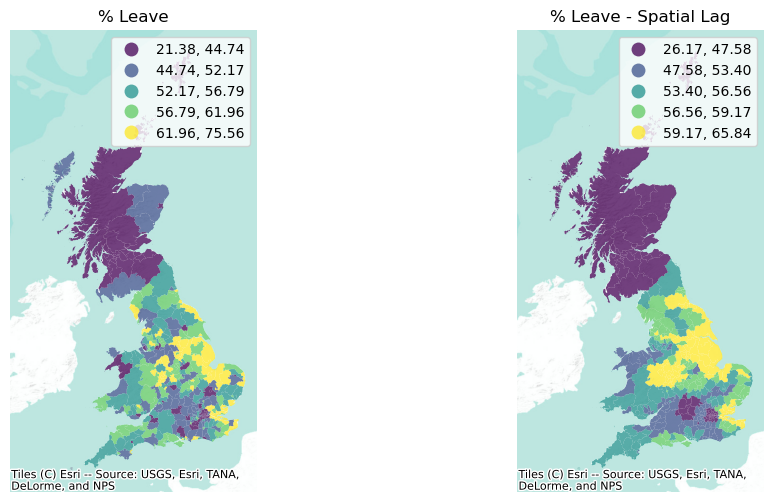

In [29]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

db.plot(
        column="Pct_Leave",
        cmap="viridis",
        scheme="quantiles",
        k=5,
        edgecolor="white",
        linewidth=0.0,
        alpha=0.75,
        legend=True,
        ax=axes[0]
       )
axes[0].set_axis_off()
axes[0].set_title("% Leave")
contextily.add_basemap(
     ax=axes[0],
     crs=db.crs,
     source=contextily.providers.Esri.WorldTerrain,
    )

db.plot(
        column="Pct_Leave_lag",
        cmap="viridis",
        scheme="quantiles",
        k=5,
        edgecolor="white",
        linewidth=0.0,
        alpha=0.75,
        legend=True,
        ax=axes[1]
       )
axes[1].set_axis_off()
axes[1].set_title("% Leave - Spatial Lag")
contextily.add_basemap(
     ax=axes[1],
     crs=db.crs,
     source=contextily.providers.Esri.WorldTerrain,
    )

The stark differences on the left between the immediate nearest neighbors (KNN=8), such as in the case of Liverpool in the NW of England, are diminished in the map on the right. Thus as discussed above, the spatial lag can also smooth out the differences of nearby observations. 

### Binary case: Join counts

http://localhost:8888/api/contents/Global_spatial_autocorrelation/Global_spatial_autocorr_examplbegin to relate the behavior of a variable at a given location to it's pattern in the immediate neighborhood. Measures of global spatial autocorrelation will then ise each observation to conduct overall measures about the general trend in a given dataset. 

Out first dip into these measures considers a simplified case: binary values. This occures when the variable we are interested in takes only two values. In this context, we are interested in whether a given observation is sorrounded by others with the same category. For example, returning to our referendum dataset, we want to assess the extent to which local authorities who voted "Leave" tend to be sorrounded by others who voted to leave. To procede let us first calcuate a binary variable (Leave) that indicates 1 if the local authority voted to leave and 0 otherwise:

In [30]:
db["Leave"] = (db["Pct_Leave"]> 50.0).astype(int)
db[["Pct_Leave", "Leave"]].tail()

,Pct_Leave,Leave
lad16cd,,
W06000020,59.78,1
W06000021,49.56,0
W06000022,55.99,1
W06000023,53.74,1
W06000024,56.44,1


We can easily view this binary variable:

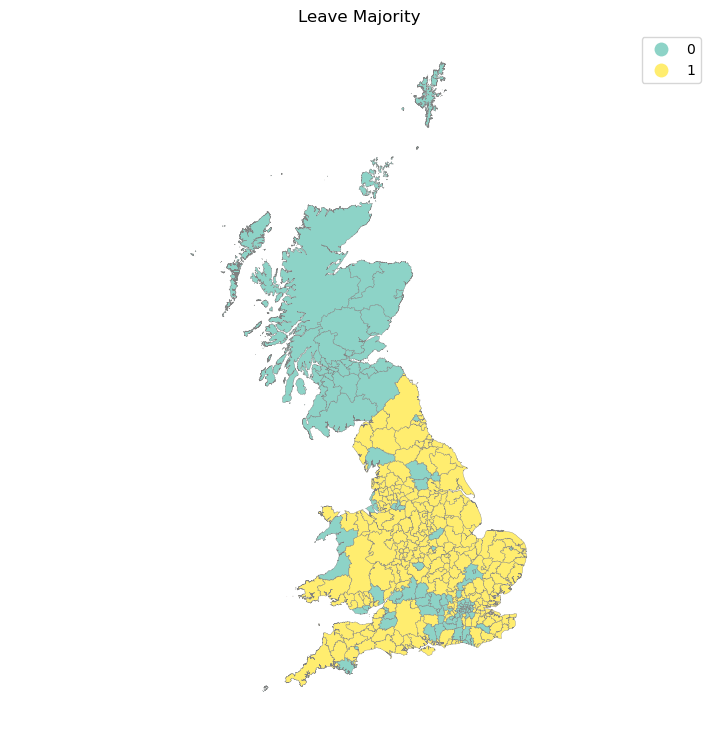

In [31]:
fig, ax = plt.subplots(1, figsize=(9, 9))
db.plot(
    ax=ax,
    column="Leave",
    categorical=True,
    legend=True,
    edgecolor="0.5",
    linewidth=0.25,
    cmap="Set3",
    figsize=(9, 9),
)
ax.set_axis_off()
ax.set_title("Leave Majority")
plt.axis("equal")
plt.show()

Visually, it appears that the map represents a clear cae of positive spatial autocorrelation: overall, there are a few visible cases where a given observation is sorrounded by others in the opposite category (often "Leave" sorrounding "Remain"). To foramlly explore this initial assessment, er can use what is called a "Join Count" statistic (JC; [CO81](https://doi.org/10.1007/978-1-4842-3012-1)). Imagine a checkerboard with green (G; value 0) and yellow (Y: value 1) squares. The iddea of the statistic is to count occurances of green-green (GG), yellow-yellow (YY), or green-yellow/yellow-green (GY) joins (or in other words, neighboring pairs) on the map. In this Context, both GG andd YY reflect positive spatial autocorrelation (like next to like beyond what random may suggest), whereas GY captures its negative counterpart (dissimilar values in closer proximity beyond what random may suggest). The intuition of the statistic is to provide a baseline of how many GG, YY, and GY one would expect for a given geographic arrangment (topography, graph) under complete spatial randomness, and to compare this with the observed counts in the dataset. A situation where we observe more GG/YY than expected and less GY than expected would be a case of positive spatial autocorrelation. Experiencing more GY than YY/GG woudld indicate a case of negative spatial autocorrelaton.

Since the spatial weights are only used here to delimit who is a neighbor or not, the join count statistic requires binary weights. Let us thus transform $\textbf{W}$ back to non-standardized state, [here](https://pysal.org/libpysal/generated/libpysal.weights.W.html#libpysal.weights.W.set_transform) are the options for setting the transform on the weights:

**set_transform**(value='B')[source](https://pysal.org/libpysal/_modules/libpysal/weights/weights.html#W.set_transform)

Transformations of weights.

Parameters: transform : str
This parameter is not case sensitive. The following are valid transformations.

* B – Binary
* R – Row-standardization (global sum)
* D – Double-standardization (global sum)
* V – Variance stabilizing
* O – Restore original transformation (from instantiation)

In [32]:
w.transform

'R'

In [33]:
w.transform = "O"

We can compute the statistic as:

In [35]:
seed(1234)
jc = esda.join_counts.Join_Counts(db["Leave"], w)
jc

As it is common throughout Pysal, we are creating an object (jc) that holds a lot of information beyond the value of the statistic calculated. For example, we can check how many occurrences of GG we have (note the attribute is bb, which originates from the original reference where the two considered classes were black and white):

In [36]:
jc.bb

872.0

Or how many were YY (ww in this case from the origina reference)

In [37]:
jc.ww

301.0

And how many GY/YG we find:

In [43]:
jc.bw

347.0

Summing them all up, either individually or through the "J" property of the jc object:

In [40]:
jc.bb + jc.ww + jc.bw

1520.0

In [41]:
jc.J

1520.0

The statistic in based on comparing the actual mumber of joins of each class (bb, ww, bw) with what one would expect in the case of spatial randomness. Those representations of randomness can be accessed as well, here we see the GG/YY cases: 

In [48]:
jc.mean_bb    #jc.mean_ww is NOT a property

728.0565565565565

... and for GY joins:

In [45]:
jc.mean_bw

648.509009009009

Statistical inference to obtain a sense of whether there values are likely to come from random chance or not  can be accessed using random spatial permutaitons of the observed values to create synthetic maps under the null hypothisis of complete spatial randomness. esda generates 99 such synthetic patterns and then uses the distribution of join counts from there patterns to generate pesudo-*p*-values for our observed join count statistics:

In [49]:
jc.p_sim_bb

0.001

In [51]:
jc.p_sim_bw

1.0

These results point to a clear presence of spatial autocorrelation, as there are a lot more joins of pairs in the same category thatn one would expect (p_sim_bb) and significantly less of opposite joins (p_sim_bw). We will discuss ther generation of the pseduo-*p*-values in more detail in the next section. 

### Continious Case: Moran Plot and Moran's I

Once we have built some intuition around how spatial autocorrelation can be formally assessed in the binary case, let's move to situations where the variable of interest is instead continious. Probally the most commonly used statistic in this contest is Moran's I [Mor48](https://geographicdata.science/book/notebooks/references.html#id41), which can be written as: 

$I = \dfrac{n}{\sum_i\sum_j w_{ij}} \dfrac{\sum_i\sum_j w_{ij} \, z_i \, z_j}{\sum_i z_i^2}$

where $n$ is the number of observations $z_i$ is the standardized value of the variable of interest at location $i$, and $W_{ij}$ is the cell corresponding to the $i$-th row and $j$-th column of a $W$ spatial weights matrix.

In order to understand the intuition behind its math, it is useful to begin with a graphical interpretation: the Moran Plot. The Moran Plot is a way of visulizing a spatial daataset to explore the nature and strength of spatial autocorrelation. It is essensially a traditional scatterplot in which the variable of interest is displayed against its *spatial lag*. In order to be able to interprate values as above or below the mean, the variable of interest is ususally standardized by subtracting its mean (in other words, we take the departure from the mean):

In [53]:
db["Pct_Leave_std"] = db["Pct_Leave"] - db["Pct_Leave"].mean()
db["Pct_Leave_lag_std"] = weights.lag_spatial(w, db["Pct_Leave_std"])

Technically speaking, creating a Moran Plot is quite simmilar to creating any other scatterplot in Python. Here we make one (Figure 4).

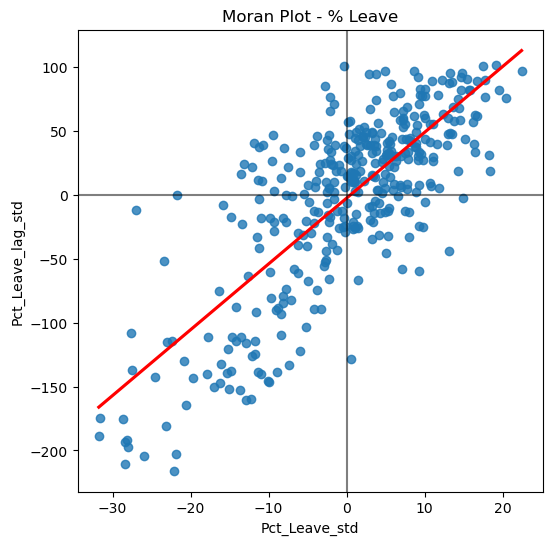

In [56]:
fig, ax, = plt.subplots(1, figsize=(6,6))

sns.regplot(
            x="Pct_Leave_std",      # Departure from mean of pct leae vote
            y="Pct_Leave_lag_std",  # Spatial lag of the departures
            data=db,                # data frame containing fields above
            ci=None,                # No confidence interval to display
            line_kws={"color":"r"},  # keyword args to pass to regression line
           )
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - % Leave")
plt.show()

The figure above displays the relationship between the standardized "Leave" voting percentage in a local authority didstrict and its spatial lag which - because of the $W$ used is **row-standardized** can be interperated as the average standardization density fo the percent Leave vote in the neighborhood of each observation. In order to help guide the interpretation of the plot a lenear regression line is also fitted. 

The plot displays a positive relationship between both variables. This indicates the presences of positive spatial autocorrelation similar values tend to be located close to each other. This means that the overall trend is for for high values to be located near other high values and low values to be located in the proximity of other low values. Thie, however, does not by itself mean that this is the only case in the dataset (i.e. this does not mean that this holds true across the entire dataset): There can of course be particular sututions where high values are located sorrounded by low values (and vice-versa) more that a random distribution would suggest. But it *does* mean that, if er had to summarixe the predominate pattern of the data in terms of how clustered similar values are, the best way would be to say that they are positivly correlated and, by extension, clustered over space. In the context of the example, This can be interpreted along the lines of: local anthorities where people voted in high proportions to leave the EU tend to be located nearby other regions that also registered high proportions of the Leave vote. In other words, we can say the percentage of Leave votes is spatially autocorrelated in a positive manner. 

The Moran Plot is an excellent tool to explore these data and get a good sense of how much values are clustered over space. However, because it is a graphical device, it is sometimes difficult to cindense its insights in a concise way. For these cases, a good approach is to come up with a statistical measure that summarizes the figure. This is exactally what Moran's I, as formally expressed above, is meant to do. 

Very much in the same way that the mean summarizess a crucial element of the distribution of values in a non-spatial setting, so does Moran's I for a spatial dataset. Continuing the comparison - we can think of the mean as a single numarical value summarizing a histogramof a kernal density plot. Similarly, Moran's I captures much of the essance of the Moran Plot. In fact, there is a close connection wbtween the two: the value of Moran's I corresponds with the slope fo the linear fit overlayed ontop of the Moran Plot. 

In order to calculate Moran;s I over our dataset, we can call a specific finction in esda directly (before that let us standardize the w object again as we returned it to its original form a while back).

In [59]:
w.transform = "R"
moran = esda.moran.Moran(db["Pct_Leave"], w)

The method Moran creates andd object that contains much more information thatn the actual statistic. If we want to retrieve the value of the statistic, we can do it as such:

In [60]:
moran.I

0.6436557633381562

In [62]:
moran.p_sim

0.001